# Introducción

La ecuación de Wright es uno de los objetos de estudio más importante en los últimos cincienta años, tanto en el estudio de la distribución de los números primos, en módelos de crecimiento poblacionales. Así como proveer a una conjetura Jones, la cual formularemos este trabajo 

## Distribución de los primos

Gauss en 1793 conjeturó el teorema del número primo que establece la siguiente expresión para el comportamiento asintótico de la función $\pi(x)$ 

\begin{equation}
\lim_{x \rightarrow \infty} \dfrac{\pi(x)\ln(x)}{x} = 1 
\end{equation}

No fue sino hasta 1896 con los trabajos J. Hadamard y C.J. De la Vallé Poussin, que se demostro dicho teorema, pero dicha demostración resultaba muy dificil de entender, así que muchos matemáticos comenzarón a buscar desmotraciones más sencilla así en 1942 Lord Cherwell durante dicha prueba introdujo la ecuación diferencial funcional
 
\begin{equation}
2x(y′′(x)/y′(x)) + y′(\sqrt{x}) = 0
\end{equation}

Pero la anterior no es para algo un ecuación facíl de tratar, pero Cherwell le escribio a Wright con la petición de investigar las propiedades de esta ecuación, entonces Wright realizando el siguiente cambio de variable 

$y′(x)ln(x) = 1+w(v)$ y $ln(x) = 2^v$ y suponiendo que $$\displaystyle \lim_{\nu \rightarrow \infty} w(\nu) = 0$$ se obtiene:

* $$\displaystyle \lim_{x \rightarrow \infty} y'(x)ln(x) = 1$$

* $$\displaystyle \lim_{x \rightarrow \infty} y'(x) = 0$$


Y ahora si calculamos $$ \displaystyle \lim_{x \rightarrow \infty} \dfrac{y(x)ln(x)}{x} = \displaystyle \lim_{x \rightarrow \infty} y'(x)ln(x) + \frac{y(x)}{x} = 1 + \displaystyle \lim_{x \rightarrow \infty} \dfrac{y(x)}{x} = 1 + \displaystyle \lim_{x \rightarrow \infty} y'(x) = 1 $$ 

En consecuencia de lo anterior se probaría el teorema de número primo


Ahora veamos que $$\dfrac{dx}{d\nu} = \dfrac{d}{d\nu} x(\nu) = \dfrac{d}{d\nu} \left( \exp(2^{\nu}) \right) = \log(2) 2^{\nu} \exp( 2^{\nu} ) = \alpha x \log(x)$$

Anora si calculamos

$$w'(\nu) = \dfrac{d w(\nu)}{d \nu} = \dfrac{d x}{d \nu} \dfrac{d }{d x} \left( y´(x) ln(x) \right) = \alpha x\ln(x)\left( y''(x) \ln(x) + \dfrac{y'(x)}{x} \right)$$

Ahora si calculamos $$\dfrac{w'(\nu)}{1 + w(\nu)} = \dfrac{\alpha x \ln(x)}{y'(x)\ln(x)} \left( y''(x) \ln(x) + \dfrac{y'(x)}{x} \right) = \alpha x \ln(x) \left( \dfrac{y''(x)}{y'(x)} + \dfrac{1}{x\ln(x)} \right) =  \alpha \left(1 + 2^{\nu-1}\dfrac{2 xy''(x)}{y(x)} \right)  =  \alpha \left(1 - 2^{\nu-1}y(\sqrt{x}) \right) $$

Por otro lado tenemos que $\ln(x) = 2^{\nu} \Longrightarrow x = \exp(2^{\nu}) \Longrightarrow \sqrt{x} = \exp(2^{\nu-1})$, del cambio de variable tenemos $1 + w(\nu) = y'(x)\ln(x) = y'(\exp(2^{\nu}))\ln(\exp(2^{\nu})$, si corremos el argumento de doblev tenemos $1 + w(\nu - 1) = y'(\exp(2^{\nu -1}))\ln(\exp(2^{\nu-1})) $

Por lo tanto tenemos $$1 + w(\nu - 1) =2^{\nu-1} y'\left(\sqrt{x}\right)$$

Es decir;

$$\dfrac{w'(\nu)}{1 + w(\nu)} =  \alpha \left(1 - 2^{\nu-1}y(\sqrt{x}) \right) =  \alpha \left(1 - 1 - w(\nu - 1) \right)  $$

con lo que la ecuación (2) se esscribe de la forma: 

\begin{equation}
w′(\nu) = − ln(2)w(\nu − 1) (1 + w(\nu)) 
\end{equation}

Que es justo la ecuación de estudio

# La conjetura de Wright (DDE)

Consideremos la ecuación de Wright que como se sabe es una Ecuación Diferencial con Retardo. Dada $y_0 \in \mathcal{C}$ el valor inicial del problema con $\mathcal{C} := \{ x : [-1,0] \longrightarrow R : f \text{ es continua} \}$

\begin{eqnarray}
y′(t) &=& \alpha y(t − 1) (1 + y(t)), \; 0 \leq t \label{eq1}\\
y(t) &=& y_0, \; \forall t \in[-1, 0]
\end{eqnarray}

Sabemos que dicha ecuación tiene solución y es única

## Solución numérica

Como se vio en clase el lado derecho de la EDR cumple ser las condiciones sufientes y necesarias para garantizar la existecia de soluciones y puesto que el retardo es constante podemos aplicar el método de los pasos para encontrar la solución a la ecuación de Wright. Para ellos usaremos algunos paquetes desarrollados en `Julia` donde se encuentra implementado el método de pasos

In [1]:
 using DelayDiffEq
using Plots
using LaTeXStrings
gr()

Plots.GRBackend()

In [2]:
const τ = 1.0
const α = 2.4

2.4

In [3]:
function wright(u,h,p,t)
   du = -α*h(p, t - τ)*(1.0 + u)
end

wright (generic function with 1 method)

In [4]:
u0 = 1.0
tspan = (0.0, 30.0)
lags = τ

1.0

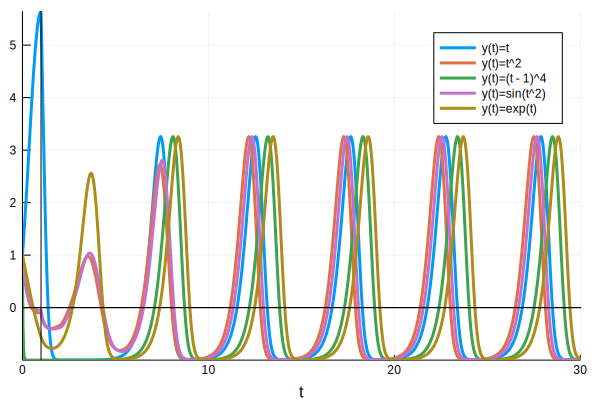

In [5]:
funtions = [h1(p, t) = t, h2(p, t) = t^2, h3(p, t) = (t - 1.0)^4, h4(p, t) = sin(t^2), h5(p, t)= exp(t)]
labels = ["y(t)=t", "y(t)=t^2", "y(t)=(t - 1)^4", "y(t)=sin(t^2)", "y(t)=exp(t)", "y(t)=ln(t)"]
plot()
for i in 1:length(funtions)
    prob = DDEProblem(wright,u0,funtions[i],tspan; constant_lags=lags)
    alg = MethodOfSteps(Tsit5())
    sol = solve(prob,alg);
    plot!(sol, label = labels[i])
end
vline!([1,0], color = :black, label = "")
hline!([0,0], color = :black, label = "")



De la gráfica anterior Wright observo que una solución periódica dada parecía atraer todas las condiciones iniciales.

#### Ahora recordemos algunas definiciones 

**Definicion**

Una *solución periódica oscilante* (SOPS) de la ecuación de Wright es una solución periódica $y(t)$ con la siguiente propiedad: existe $q> 1$ y $p> q + 1$ de manera que, hasta una traslación temporal, $y(t) > 0$ en $(0, q)$, $y(t) <0$ en $(q, p)$ e $y(t + p) = y (t)$ para todo $t$ de manera que $p$ es el período mínimo de $y(t)$.

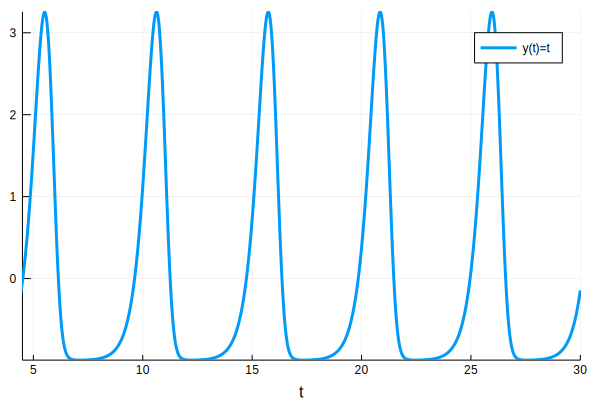

In [6]:
tspan = (0.0, 30.0)
prob = DDEProblem(wright,0.,funtions[1],tspan; constant_lags=lags)
alg = MethodOfSteps(Tsit5())
sol = solve(prob,alg);
plot(sol, label = labels[1],xlim=(4.5,30))

Jones en 1962. Propone la siguiente conjetuta, 

**Conjecture 1.1 (Jones, 1962).** para $\alpha > \frac{\pi}{2}$, la ecuación de Wright, tiene una única solución oscilante peridica.

* Walther en muestra que si la conjetura de Jones es cierta, entonces la SOPS es única y atrae un subconjunto denso y abierto del espacio de fase. 

* Un resultado de Chow y Mallet-Paret muestra que hay una bifurcación de Hopf supercritica de la SOPS a partir de la solución trivial en $\alpha = \frac{\pi}{2}$. Esta rama de SOPS que se bifurca (adelante en $\alpha$) desde $0$ se denota por $F_0$.

* Regala luego probó en su tesis doctoral un resultado que implica que no puede haber bifurcaciones secundarias de $F_0$. Por lo tanto, $F_0$ es una curva regular en el espacio $(\alpha, y)$.

*  Más tarde, Xie usó estimaciones asintóticas para demostrar que $\alpha > 5.67$. 

* Combinando la estrategia empleada por Xie con un riguroso integrador numérico, demuestra que la ecuación de Wright tiene una única SOPS para todo el valor del parámetro $\alpha \in 2 [1.9.6.0]$. 

* Usando tecnicas métodos númericos garantizados se demostro que la rama $F_0$ no tiene dobleces para $\alpha \in (\pi/2 + 7.3165 \times 10^{-4}, 2.3]$. 

* Jean-Philippe Lessard demuestra también usando pruebas asistidas por computadora que no existen dobleces de la rama $F_0$ para $\alpha \in (\pi/2, \pi/2 + 6.83 \times 10^{-3}]$

Con el trabajo realizado hasta entonces la conjetura de Jones se reformula de la siguiente manera

**Conjetura 1.2 (Conjetura de Jones reformulada).** No hay componentes conectados (isolas) de SOPS disjuntos de $F_0$ en el rango de parámetros $(\pi/2, 1.9]$

# Continuación rigurosa de soluciones 

Consideremos $(X, \vert\vert \cdot \vert\vert_{X})$ y $(Y, \vert\vert \cdot \vert\vert_{Y})$, dos espacios de Banach y $F: X\times \mathbb{R} \longrightarrow Y$ una aplicación de clase $\mathcal{C} ^1$ y considermos el problema de encontrar soluciones para $F(x, \lambda) = 0$ con $\lambda \in \mathbb{R}$ y $x$. Es importante darse cuenta de que el conjunto de soluciones debe cumplir que $\mathcal{S} := \{(x, \lambda) \in \subset X \times \vert F(x, \lambda) = 0 \} \subset X \times \mathbb{R}$

## Algoitmos Predictor-Corrector 


![](image.png)

imagen tomada de la notas de Jean-Philippe Lessard

El predictor se obtiene asumiendo que en la solución $(x_0, \lambda_0)$ la matriz jacobiaba $\mathcal{D}_{x}F(x_0, \lambda_0)$ es invertible. Por el teorema de función implicíta que curva solución está localmete parámetrizada por $\lambda$


 $$\dfrac{\partial}{\partial \lambda} F(x , \lambda) = 0 \Longrightarrow \mathcal{D}_{x}F(x_0, \lambda_0) \dfrac{d x}{\lambda}(\lambda)  + \dfrac{\partial F}{\partial \lambda} (x , \lambda) = 0  \Longrightarrow  \dfrac{d x}{d \lambda}(\lambda)  =  -\left( \mathcal{D}_{x}F(x_0, \lambda_0) \right)^{-1} \dfrac{\partial F}{\partial  \lambda} (x , \lambda) $$
 
 El vector tangente a $(x_0, \lambda_0)$ se obtiene $\dot{x}_{0} = \dfrac{d x}{d \lambda}(\lambda_0)$, es decir $$\dot{x}_{0} = -\left( \mathcal{D}_{x}F(x_0, \lambda_0) \right)^{-1} \dfrac{\partial F}{\partial  \lambda} (x_0 , \lambda_0) $$
 
 Ya que tenemos el vector tangente, el predictor se define por $$\hat{x_1} = x_0 + \Delta_{\lambda}\dot{x}_0$$
 
 Después corregimos el predictor usando el método de Newton
 
 $$x_1^{(0)} = \hat{x_1}, \quad  x_1^{(n+1)} = -\left( \mathcal{D}_{x}F(x_1^{(n)}, \lambda_1) \right)^{-1} F \left(x_1^{(n)} , \lambda_{1} \right)$$

Algunas veces resulta mas natural parametrizar la rama solución por *longitud de arco* o *pseudolongitud de arco* esto cuando la curva no se puede parametrizar localmente por $\lambda$, es decir donde la matrix Jacobiana es singular

![](image2.png)

En el algoritmo de continuación de pseudolongitud de arco el valor del parámetro ya no es fijo y en su lugar se deja como una variable. Si tomamos $X = (x, \lambda)$ y el problema $F(X) = 0$ tal que $F\mathbb{R}^{n+1} \longrightarrow \mathbb{R}^{n}$ y procediento de manera análoga como antes. El proceso comienza con una solución $X_0$ dada con la que se genera un predictor, calculamos primero un vector tangente unitario a la curva en $X_0$, esto es 

$$\mathcal{D}_{x}F(X_0)\dot{X}_0 = \left[ \mathcal{D}_{x}F(\overline{x}_0, \overline{\lambda}_0)  \dfrac{\partial F}{\partial  \lambda} (x_0 , \lambda_0) \right]\dot{X}_0 = 0 \in \mathbb{R}^n $$

Ahora fijamos un parametro de pseudolongitud de arco $\Delta_{s} > 0$ entonces definimos al predictor como

$$\hat{X_1} = \overline{X}_0 + \Delta_{s} \dot{X}_0 \in \mathbb{R}^{n+1}$$

Una vez que se tiene predictor, corregimos hacia el conjunto $\mathcal{S}$ en el hiperplano $E(X) := (X - \hat{E_1})\cdot \dot{X}_0 = 0$ perpendicular al vector tangente $\dot{X}_0$ que contiene el predictor $X_1$. Como en el caso anterior aplicamos el método de Newton pero a la función 

\begin{equation}
X \mapsto \begin{bmatrix}
           E(X) \\
           F(X)
         \end{bmatrix}  
\end{equation}

Los algoritmos mencionados anteriormente no cubren el caso de bifurcaciones de soluciones, pitchfork, puntos de bifurcación, bifurcaciones de Hopf, etc.